In [1]:
import numpy as np
from isomap import *
import pandas as pd
from dynamictimewarping import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')

In [3]:
data.head()

Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0           0.22           0.17           0.11           0.39  
1           0.50           0.10           0.60           0.00  
2           1.00           0.45           0.45           0.36  
3           0.71           0.35           0.29           0.35  
4           0.13           0.53           0.33           0.40  

[5 rows x 107 columns]

In [4]:
# Keeping only normalized values
ind = [i for i in range(data.shape[1]) if 'Normalized' in data.columns[i]]
data = data.iloc[:, ind]
# Keeping only a numpy array
data = data.values
# For computation reasons, we only keep 200 rows
data = data[:50, :]

# Getting the affinity matrix (DTW)

We compute the Dynamic Time warping distances between all the time series and store them in the np array dtw

In [5]:
# dtw_ is an instance of our DTW class which computes the dynamic time warping distances
dtw_ = DTW(distance=l2)
dtw = dtw_.fit(data,verbose = True)

0.0 % done
20.0 % done
40.0 % done
60.0 % done
80.0 % done


In [13]:
print(dtw)
print(dtw.shape)

[[0.     1.5263 2.341  ... 1.3747 1.2622 1.2524]
 [1.5263 0.     2.2246 ... 1.8786 1.4787 1.5126]
 [2.341  2.2246 0.     ... 1.5839 1.7127 1.7592]
 ...
 [1.3747 1.8786 1.5839 ... 0.     1.1599 1.4144]
 [1.2622 1.4787 1.7127 ... 1.1599 0.     1.2847]
 [1.2524 1.5126 1.7592 ... 1.4144 1.2847 0.    ]]
(50, 50)


We indeed notice that for the l2 norm we used, the diagonal of the dissimilarity matrix is always 0.

# Reducing the dimension using Isomap

In [36]:
from sklearn.datasets import make_swiss_roll
n = 400 # Number of points to consider (size of the dataset)
X, y = make_swiss_roll(n_samples=n, noise=0.5) # X contains the point, y their color

In [37]:
print(X.shape)

(400, 3)


In [13]:
def dissimilarity(data):
    '''
        Return the dissimilarity between the points in matrix `data` (n_samples, n_features).
        Here, the dissimilarity is the squared Euclidean norm. It could be something else.
    '''
    data_sq = np.sum(data**2, 1)
    D = data_sq + data_sq[:, None] - 2 * data.dot(data.T)
    return D

D = dissimilarity(X)

In [39]:
D.shape

(400, 400)

In [40]:
mmds = MMDS(n_components=2, n_iter=100)
mmds.fit(D, verbose = True)

test
initial [[ 6.94074057e-01  9.56419830e-01]
 [ 1.60646117e+00 -9.33766676e-02]
 [ 1.14838832e+00  7.89572868e-01]
 [-3.09241698e-01 -5.72693183e-02]
 [-9.17326671e-01 -2.61861031e-01]
 [ 1.20237675e+00 -8.56559915e-02]
 [ 1.26008798e+00  5.08502012e-01]
 [ 1.23341204e+00 -1.31885842e-01]
 [-3.66670423e-01  1.56588695e+00]
 [ 1.82062903e+00 -7.95777835e-02]
 [-1.35082721e+00 -6.56527036e-01]
 [-1.46453316e-01  1.03234507e+00]
 [-9.50458138e-02 -1.77990673e+00]
 [-4.26369433e-01  9.98284804e-01]
 [ 2.15756093e-01 -6.17030936e-01]
 [-1.19604534e-01  1.64530228e+00]
 [-7.02734642e-01  1.93625254e-01]
 [-5.96814057e-01 -7.32221827e-01]
 [ 6.36008353e-01 -1.34899375e+00]
 [-1.06687592e+00  6.84787323e-01]
 [ 9.13375450e-01  3.78975241e-01]
 [ 6.70964225e-01 -6.75155994e-03]
 [-7.25090325e-01 -2.52973328e+00]
 [-1.83505114e+00 -5.40234865e-01]
 [ 1.50521129e+00  2.36840644e+00]
 [ 8.40350263e-01  1.82128792e-01]
 [ 3.73579268e-01  7.43220282e-01]
 [-7.47700604e-01  5.30866233e-01]
 [ 9.74

[[  99.85092442  235.2154366 ]
 [  26.50620077   60.48212973]
 [-131.2945328    58.8872087 ]
 [ 164.91182676 -192.10143943]
 [  57.09813036  -55.20622327]
 [ 113.80265809    7.67938195]
 [ 223.77224786   62.481416  ]
 [ 221.54536983  -86.40854179]
 [ 169.31328596  258.10987803]
 [   2.76078977   -2.90156729]
 [ -77.93850752   38.89711676]
 [ 159.04811967   42.94676616]
 [ -76.50598105 -179.73756435]
 [ -80.51931298   70.89509093]
 [-188.80813209 -212.48083912]
 [-193.6973943   190.86072173]
 [-125.6897012  -148.55784334]
 [-209.35300599  -99.49333092]
 [ 206.03695561 -107.76815877]
 [-194.76408355  -89.77176839]
 [  66.91597194  102.7117363 ]
 [ -33.99239394  112.55281845]
 [-128.7989499   -74.33736373]
 [-127.62761833 -189.82696317]
 [ -80.77494528  168.62602654]
 [ 260.98245824  -48.00054401]
 [ 291.52686668  125.08916635]
 [ 180.59883119  -11.67015341]
 [  61.51154742  -46.97391071]
 [ 217.79169493  -81.81637684]
 [  20.13342211 -253.46425785]
 [ 132.79898996    2.09373113]
 [ 289.2

[[ 1.45283976e+02  1.71726015e+01]
 [ 2.26426184e+01  1.12127320e+02]
 [-1.85950360e+02  1.19586835e+01]
 [ 2.08493549e+02 -1.54162736e+02]
 [ 5.74598860e+01 -6.34071162e+01]
 [ 1.13730108e+02  3.37447126e+01]
 [ 8.56723491e+01 -1.38382781e+02]
 [ 2.10356404e+02 -5.35478375e+01]
 [ 3.03324905e+02  1.14928208e+01]
 [-4.02886006e+00  3.26449023e+01]
 [-8.17238413e+01  6.77773374e+01]
 [ 1.61504850e+02  5.06866226e+01]
 [-5.52123174e+01 -1.95121283e+02]
 [-8.24211010e+01  1.04574948e+02]
 [-2.46061106e+02  1.85591657e+02]
 [-2.24233591e+02  1.74432183e+02]
 [ 1.24379381e+02 -2.10487096e+02]
 [-1.59407193e+02 -1.52075966e+02]
 [ 2.24631703e+02 -6.56915176e+01]
 [ 2.35314036e+01 -2.42074686e+02]
 [ 4.11618184e+01  1.64495185e+02]
 [-6.62081513e+01  1.40379854e+02]
 [-1.83662308e+02  1.89549858e+01]
 [-7.16595870e+00 -2.36056515e+02]
 [-1.18121310e+02  1.97833311e+02]
 [ 2.32619700e+02 -1.26720012e+02]
 [ 2.42522823e+02 -2.01227793e+02]
 [ 1.76227576e+02 -5.07125754e+01]
 [ 5.68669678e+01 -4

1222094383.8325806
Iter 36 out of 100 iterations
[[ -77.19160032 -265.07554787]
 [  15.79591973  104.45631177]
 [-180.63924855   32.9554535 ]
 [ 199.39540052 -160.38547762]
 [  62.72210222  -54.92712811]
 [ 112.26757371   18.6140728 ]
 [ -55.82506958 -244.50101393]
 [ 239.89710998   50.97081912]
 [ 309.20311201   45.64716963]
 [   1.77673597   48.84215414]
 [ -87.15182746   45.58861782]
 [ 166.29193631  102.75073343]
 [ -45.648453   -198.72340646]
 [ -93.77991472   86.53441736]
 [-239.52154588  188.58285521]
 [-234.12955599  155.0823105 ]
 [ 127.05787225 -209.00185   ]
 [-147.78920365 -169.43493363]
 [ 227.01461638  -52.4938235 ]
 [  38.23647628 -234.80417671]
 [  26.99968513  149.07954677]
 [ -91.60237668  113.24560074]
 [-175.99470497   50.35001859]
 [   3.74928337 -234.70277727]
 [-119.68700016  195.41063897]
 [ 222.39615135 -134.9842055 ]
 [ 261.4310685  -164.72770075]
 [ 189.90850744  -16.46836523]
 [  68.41041038  -17.3864357 ]
 [ 233.72512849  -16.23727864]
 [ 140.19078373 -217.

[[-7.62967192e+01 -2.62192099e+02]
 [ 7.76363147e+00  9.29222458e+01]
 [-1.78701984e+02  3.97969905e+01]
 [ 1.96994928e+02 -1.63367044e+02]
 [ 6.44909413e+01 -5.28730129e+01]
 [ 1.06218539e+02  5.55764374e+00]
 [-5.74121324e+01 -2.45514629e+02]
 [ 2.41089848e+02  6.41070266e+01]
 [ 3.08307994e+02  6.99327507e+01]
 [ 3.63064884e+00  5.14492047e+01]
 [-8.84346759e+01  3.90881370e+01]
 [ 1.66345546e+02  1.07450769e+02]
 [-4.45052846e+01 -1.98563208e+02]
 [-9.82421579e+01  7.40483665e+01]
 [-2.51743399e+02  1.72492484e+02]
 [-2.39535526e+02  1.46119043e+02]
 [ 1.23994959e+02 -2.10977552e+02]
 [-1.47530522e+02 -1.71936115e+02]
 [ 2.26657602e+02 -5.43824540e+01]
 [ 4.39499898e+01 -2.31943926e+02]
 [ 1.59653584e+01  1.41969524e+02]
 [-1.05361733e+02  9.41546840e+01]
 [-1.72981060e+02  5.87490384e+01]
 [ 6.04798457e+00 -2.33595854e+02]
 [-1.23464747e+02  1.91629415e+02]
 [ 2.20436243e+02 -1.38601012e+02]
 [ 2.86890979e+02 -1.25536114e+02]
 [ 1.92198123e+02 -1.19995730e+01]
 [ 7.22204511e+01 -1

Iter 62 out of 100 iterations
[[-7.45604531e+01 -2.61815179e+02]
 [ 4.61595130e+00  8.64669445e+01]
 [-1.78158479e+02  4.28971979e+01]
 [ 1.95708400e+02 -1.64452212e+02]
 [ 6.51721852e+01 -5.21309645e+01]
 [ 1.02459525e+02  1.17807237e+00]
 [-5.80156259e+01 -2.45791204e+02]
 [ 2.41336669e+02  6.82745268e+01]
 [ 3.07233948e+02  7.74243456e+01]
 [ 4.29116048e+00  5.26542351e+01]
 [-8.89389695e+01  3.68146569e+01]
 [ 1.66353241e+02  1.08902164e+02]
 [-4.41563278e+01 -1.98514066e+02]
 [-9.86295546e+01  6.86743899e+01]
 [-2.56878020e+02  1.63942401e+02]
 [-2.41435436e+02  1.42850325e+02]
 [ 1.22703075e+02 -2.11651361e+02]
 [-1.47684251e+02 -1.72545537e+02]
 [ 2.26248852e+02 -5.55879079e+01]
 [ 4.58738988e+01 -2.31277054e+02]
 [ 1.05827105e+01  1.36429910e+02]
 [-1.08572813e+02  8.46926815e+01]
 [-1.71838084e+02  6.41669616e+01]
 [ 6.90284569e+00 -2.33380590e+02]
 [-1.25089363e+02  1.89994413e+02]
 [ 2.19487852e+02 -1.39807663e+02]
 [ 2.92601803e+02 -1.15778742e+02]
 [ 1.92861862e+02 -1.0431

[[-7.40417371e+01 -2.61692213e+02]
 [ 3.75287234e+00  8.45259828e+01]
 [-1.77993860e+02  4.41694807e+01]
 [ 1.95313574e+02 -1.64776674e+02]
 [ 6.53520979e+01 -5.19116006e+01]
 [ 1.01806464e+02 -4.59735208e-01]
 [-5.81923688e+01 -2.45892893e+02]
 [ 2.41369591e+02  6.95970628e+01]
 [ 3.06866796e+02  7.95813019e+01]
 [ 4.48535656e+00  5.30407728e+01]
 [-8.91496581e+01  3.60896647e+01]
 [ 1.66300680e+02  1.09363745e+02]
 [-4.40790146e+01 -1.98507981e+02]
 [-9.90236289e+01  6.71575710e+01]
 [-2.58215539e+02  1.61654577e+02]
 [-2.42389608e+02  1.41284936e+02]
 [ 1.22372391e+02 -2.11863552e+02]
 [-1.47765432e+02 -1.72729672e+02]
 [ 2.26144762e+02 -5.59143056e+01]
 [ 4.63453692e+01 -2.31064356e+02]
 [ 9.31881396e+00  1.34317968e+02]
 [-1.09533828e+02  8.10114803e+01]
 [-1.70203531e+02  6.84814878e+01]
 [ 7.10675248e+00 -2.33319727e+02]
 [-1.25552216e+02  1.89532884e+02]
 [ 2.19235920e+02 -1.40129577e+02]
 [ 2.94258714e+02 -1.13258021e+02]
 [ 1.93058242e+02 -9.91538303e+00]
 [ 7.40880659e+01 -9

Iter 87 out of 100 iterations
[[-7.38154248e+01 -2.61622415e+02]
 [ 3.38079423e+00  8.35990946e+01]
 [-1.77872132e+02  4.48538562e+01]
 [ 1.95057215e+02 -1.64981560e+02]
 [ 6.54412884e+01 -5.18035964e+01]
 [ 1.01387355e+02 -1.31944668e+00]
 [-5.82731995e+01 -2.45949877e+02]
 [ 2.41401404e+02  7.01910782e+01]
 [ 3.06729518e+02  8.05058945e+01]
 [ 4.56840020e+00  5.32225850e+01]
 [-8.92595959e+01  3.57405572e+01]
 [ 1.66288926e+02  1.09579168e+02]
 [-4.40479368e+01 -1.98505775e+02]
 [-9.91969323e+01  6.65079410e+01]
 [-2.58862579e+02  1.60554672e+02]
 [-2.42887575e+02  1.40611879e+02]
 [ 1.22196812e+02 -2.11988764e+02]
 [-1.47811353e+02 -1.72822263e+02]
 [ 2.26082184e+02 -5.60767652e+01]
 [ 4.65586966e+01 -2.30951667e+02]
 [ 8.74679289e+00  1.33183462e+02]
 [-1.10070031e+02  7.90143236e+01]
 [-1.68913771e+02  7.04717428e+01]
 [ 7.19319406e+00 -2.33288094e+02]
 [-1.25776058e+02  1.89315581e+02]
 [ 2.19086770e+02 -1.40302209e+02]
 [ 2.95471138e+02 -1.11581198e+02]
 [ 1.93148331e+02 -9.6838

([array([[ 117.73217584,  162.30075934],
         [ 152.25135854,   -7.44146084],
         [ 142.46677383,   99.52472165],
         [ -49.08003085,  -22.1480257 ],
         [ -80.22856796,  -31.94951767],
         [ 127.10085983,   -9.11715073],
         [ 192.07168466,   77.04475278],
         [ 186.61815639,  -29.69029533],
         [ -55.93966681,  266.7128452 ],
         [ 119.81723821,   -8.32319655],
         [-125.21678363,  -58.13007792],
         [  -9.69085405,  140.34415967],
         [ -15.23275731, -208.36012174],
         [ -53.61137733,  114.50518721],
         [  39.11888482, -114.26113351],
         [ -24.29715051,  251.67523033],
         [-117.31623431,   24.20952438],
         [-101.14358692, -111.46459674],
         [  90.59001909, -184.08217443],
         [-169.98225643,   97.229084  ],
         [ 125.60801969,   49.20156273],
         [  96.30774692,    0.985959  ],
         [ -68.94693103, -218.97325464],
         [-228.88329685,  -72.81543184],
         [ 135.3

In [41]:
print(mmds.stress)

[37995.25255500232, 35186.57821457707, 33298.661952803785, 31618.854911903243, 29999.970307606887, 28276.12986695674, 26291.331737067092, 24156.303639263253, 22070.522372297622, 20202.320975122486, 18567.361944861444, 17151.566585720484, 15920.739193252275, 14939.145189417564, 14116.348249979845, 13403.593793760916, 12753.097220138665, 12158.434942467831, 11611.488421672166, 11076.128143854103, 10579.101979723682, 10141.374037145204, 9691.287566655597, 9288.111914158371, 8989.35788046802, 8768.866245903844, 8596.000830427658, 8422.715652834124, 8262.744159959087, 8149.23215935157, 8058.1153007909625, 7958.187470262423, 7827.803412847433, 7724.207406878082, 7669.7321151082115, 7638.089898953628, 7615.796535168525, 7598.806106611091, 7585.884253655261, 7575.907571156089, 7567.933250941217, 7561.493278661197, 7556.325043655271, 7552.131462475653, 7548.686222103252, 7545.783893116871, 7543.22061783278, 7540.9898561400205, 7539.061104657493, 7537.364256157925, 7535.870400409634, 7534.575143

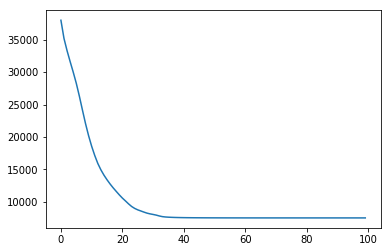

In [43]:
plt.plot(mmds.stress)

In [44]:
mmds.fit(dtw)

test
initial [[-0.29132973 -0.06971523]
 [-1.53807868 -1.47251687]
 [-0.202261   -0.47649413]
 [-0.93267072  0.53218961]
 [-0.39642252  1.38916982]
 [-0.4010751   1.05768658]
 [ 1.59178345  0.40930831]
 [-1.95923994 -0.2148689 ]
 [ 1.36722948  0.17958054]
 [-0.96709397 -0.5347364 ]
 [ 0.36514867 -0.95574856]
 [ 1.47410614  2.08664598]
 [ 0.47611826  1.70980887]
 [ 1.15662283 -0.95133351]
 [-0.51716578  0.19496116]
 [ 0.54438378  0.07804549]
 [ 0.62698062 -0.71481681]
 [-0.00299998 -1.33992413]
 [-0.49759407 -0.41121804]
 [ 1.06306292 -1.70417501]
 [-0.53437999  0.47801208]
 [-0.6930284  -0.05044766]
 [-0.34264548 -0.95434264]
 [ 2.09339288 -0.88148576]
 [-0.76431143 -1.03423394]
 [-1.66322531  1.07543613]
 [ 0.53703943 -0.94932795]
 [-1.76842198  0.52998328]
 [ 1.28996834  0.49011729]
 [ 2.90921963 -0.34272068]
 [-1.0863183  -0.01315429]
 [-0.71250419 -1.63004994]
 [-0.04127522  0.03956963]
 [-1.94761332 -0.20921915]
 [-0.29999767  0.47097397]
 [-1.23797962  0.1905397 ]
 [-0.71590775 -

567.183908843512
[[-0.04463876  0.69928085]
 [-1.16779253 -0.67306435]
 [ 1.26632267 -1.17669705]
 [-0.57407958  0.5231377 ]
 [ 0.21062279  0.83366319]
 [ 0.9998895   1.13231589]
 [ 0.00248382  0.58203643]
 [-1.07176928  0.91955121]
 [ 0.98833036 -0.13926525]
 [ 0.51160608  0.1982088 ]
 [ 1.56766386  0.57804144]
 [-0.07086686  1.0935422 ]
 [ 0.63759599 -0.29666357]
 [ 0.80926616  0.34592139]
 [-1.17421594  0.49037299]
 [-0.8995134   0.2367334 ]
 [ 0.22163093 -0.79275117]
 [-0.5313681  -0.61267252]
 [ 0.95185924  0.23753191]
 [ 1.01007657 -0.58609002]
 [-0.64823922 -0.82843202]
 [-0.64459952 -0.26680095]
 [-0.05068393 -0.11016405]
 [ 0.04235555 -1.05442427]
 [-0.3657847   0.75207412]
 [-0.08624725  1.62682815]
 [-0.32611914 -0.79502519]
 [-0.83117345 -0.17717076]
 [ 0.4363271   0.90028992]
 [ 0.25993382 -1.50879691]
 [-0.04633882  0.12702373]
 [-0.57228875 -1.3166544 ]
 [ 1.20995177 -0.57835639]
 [-1.26800887 -0.51696326]
 [ 0.11694436  1.49856672]
 [-0.05031237  0.33085363]
 [-0.464754

([array([[-0.11550306,  0.05032257],
         [-1.00170581, -0.96009542],
         [-0.04751071, -0.45616148],
         [-0.60138631,  0.54761185],
         [-0.13158236,  0.98285649],
         [-0.16363028,  1.10307176],
         [ 1.00872752,  0.36816595],
         [-1.35804188, -0.12015568],
         [ 0.92378118,  0.1906499 ],
         [-0.63768029, -0.32099991],
         [ 0.50891662, -0.86459858],
         [ 0.70615512,  1.07653282],
         [ 0.32891394,  0.99197063],
         [ 0.81099707, -0.55925116],
         [-0.35368536,  0.32929601],
         [ 0.52834513,  0.24890038],
         [ 0.61686642, -0.45407377],
         [ 0.07254654, -0.94861915],
         [-0.30252416, -0.28430319],
         [ 0.76678655, -1.08583174],
         [-0.31036829,  0.59694948],
         [-0.5053776 ,  0.02826578],
         [-0.17090751, -0.61173577],
         [ 1.2152633 , -0.46869669],
         [-0.5007146 , -0.65599057],
         [-1.13478689,  0.96375911],
         [ 0.52776363, -0.67270907],
 

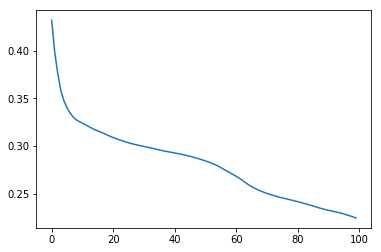

In [45]:
plt.plot(mmds.stress)

In [6]:
iso = Isomap(k_neighbors=10, method='knn', n_components=2, n_iter=100)
iso.fit(dtw)

test
initial [[-1.40390219  1.4794523 ]
 [-0.14947337 -0.70553317]
 [-0.60438384  1.14466646]
 [-1.64383356  0.6084275 ]
 [-0.45415875  1.20112642]
 [-0.60395863 -0.89113154]
 [-1.61221375 -0.43393823]
 [-0.92744411 -0.41982888]
 [ 0.20889697  1.40781515]
 [ 0.20018489  0.51270292]
 [ 0.50441573 -0.2955098 ]
 [ 0.68973934 -0.08649955]
 [ 2.19338545  0.99860686]
 [ 0.17768966 -0.36194507]
 [-0.7278188  -0.44656131]
 [-0.48679249  0.60778274]
 [ 0.83731335 -1.0647306 ]
 [ 1.46136481  0.50839554]
 [ 0.73492649 -0.5086405 ]
 [-0.22619477  1.61006564]
 [-0.09381557 -0.59911902]
 [ 0.86180696 -0.63526222]
 [-1.44289102 -2.10335972]
 [-0.77014406 -0.04424824]
 [-1.71752257 -0.03096395]
 [-2.02441374 -1.10993326]
 [ 0.05386698 -0.91392382]
 [ 0.5497907  -0.35155583]
 [ 0.29715495  2.01484533]
 [-0.42606059  0.18302994]
 [ 1.2295275   0.1151139 ]
 [-0.53271421 -0.00931317]
 [ 1.25886469 -0.34905787]
 [ 0.12937314 -1.28806486]
 [-0.9531325   0.28805756]
 [-0.67545301 -0.11801199]
 [ 0.105112   -

In [7]:
iso.stress

[1.3526777637851468,
 1.1909864316478134,
 1.1435686142739052,
 1.1289931306764516,
 1.1157078184204543,
 1.1020409017720927,
 1.0893680640927081,
 1.077441917821439,
 1.0656089189716902,
 1.0534736109049792,
 1.040524583924616,
 1.0248906039272465,
 1.0108587604474792,
 0.9990074493014673,
 0.9886260289335198,
 0.9789894938212906,
 0.969477622387514,
 0.9588134200958036,
 0.9498968830425986,
 0.9377332132140904,
 0.9267693660612963,
 0.9174451793773715,
 0.9096400923090445,
 0.9027347627715617,
 0.8961471414284417,
 0.8895571454847709,
 0.8826426538173578,
 0.8725751525258536,
 0.864824749728437,
 0.8560386318855763,
 0.8488462731722931,
 0.8408051668158976,
 0.8321251261078185,
 0.8245614216710675,
 0.8182994897475153,
 0.812702456337046,
 0.8071440178399201,
 0.801297903996794,
 0.7952849838938831,
 0.7889595266095223,
 0.7815711720307357,
 0.7742314907098268,
 0.7674297350835858,
 0.7619309994323149,
 0.7575102138776739,
 0.7535533234101318,
 0.7495418898981984,
 0.7452467543191107

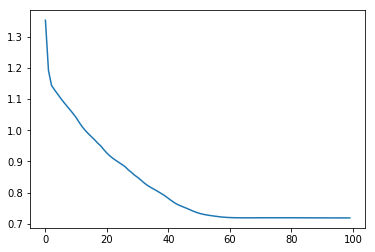

In [8]:
plt.plot(iso.stress)

In [9]:
from sklearn.datasets import make_swiss_roll
n = 400 # Number of points to consider (size of the dataset)
X, y = make_swiss_roll(n_samples=n, noise=0.5) # X contains the point, y their color

In [39]:
iso = Isomap(epsilon = 0.3, method='epsilon', n_iter=300, n_components=2)

In [40]:
D = dissimilarity(X)
iso.fit(D)

test
initial [[-1.05693939e-01 -1.27317309e+00]
 [-9.27750169e-01  1.09703165e+00]
 [-1.54483340e+00 -5.29354866e-01]
 [-8.78570536e-01  2.00979166e+00]
 [ 4.75875237e-01  1.25933149e+00]
 [-5.97245016e-01 -4.22756028e-01]
 [-2.19871268e-01  2.67722428e+00]
 [ 8.34543691e-01 -1.88886107e+00]
 [ 1.18301564e+00  1.23472925e-02]
 [ 1.06044533e+00 -2.46903251e-01]
 [ 7.71015380e-01  9.07117119e-01]
 [-3.54803147e-01  1.37028222e+00]
 [ 1.38889586e+00 -2.11200989e+00]
 [-4.16979926e-01 -5.99198642e-01]
 [-3.08159649e-01  6.66445932e-01]
 [-5.35799029e-01 -6.02067690e-01]
 [-1.24175199e+00 -1.25956470e-01]
 [-3.35841975e-01 -6.09796171e-02]
 [-2.39378717e-01 -1.23412869e+00]
 [-1.37689472e+00 -2.20093629e-01]
 [-7.71649644e-02  1.08243569e+00]
 [-1.52480240e+00  2.27230674e-01]
 [ 8.88584817e-02  1.41811166e+00]
 [-9.18103253e-01  1.69869069e-01]
 [ 4.56278087e-01 -1.48896487e-01]
 [ 9.19305351e-02 -2.81808872e-02]
 [-7.24906499e-01 -1.32377976e+00]
 [-1.06938461e+00 -4.50385731e-01]
 [ 1.94

[[ 1.54662953e+01 -6.82310868e+00]
 [-2.80263098e+01  2.85621647e+01]
 [-5.51938627e+01 -2.86961884e+01]
 [ 3.49940460e+01  3.97445212e+00]
 [-2.04695323e+01  8.71413119e+00]
 [-4.82103323e+01 -1.02327418e+01]
 [-3.48950351e+01  4.43944225e+01]
 [-9.29227760e+00 -1.53010027e+01]
 [ 1.25145683e+01  4.79739559e+01]
 [ 3.63701230e+01 -8.05996038e+00]
 [-1.23974162e+01  2.35986063e+01]
 [-1.78336767e+01  1.62821414e+01]
 [-6.42892890e+00 -2.77127466e+00]
 [-4.00949670e+01 -3.59967668e+01]
 [-1.45713579e+01  1.53820521e+01]
 [ 3.07838183e+01 -1.38088339e+01]
 [-4.88436282e+01 -3.23645382e+00]
 [-2.67299703e+01 -6.58187624e+00]
 [-1.04236378e+01 -4.41530682e+00]
 [-4.16957653e+01 -1.10163729e+01]
 [ 3.34512432e+01  1.47943049e+01]
 [-3.53992159e+01 -9.71648577e+00]
 [ 1.09358458e+01 -3.68595726e+00]
 [-3.47766269e+01  4.44099295e+00]
 [ 4.60059454e+01 -2.24952541e+01]
 [ 3.26736689e+01 -7.93877161e+00]
 [-5.49078122e+00  1.33074785e+00]
 [-5.19287747e+01 -1.53189811e+01]
 [ 2.74500807e+01  5

[[ 1.78011675e+01 -6.20057831e+00]
 [-2.38635123e+01  2.96501266e+01]
 [-3.33485596e+01 -5.08348417e+01]
 [ 3.73225177e+01 -1.16732861e+01]
 [-1.81726540e+01 -4.86650950e+00]
 [-4.61769769e+01  1.15550523e+01]
 [-5.21082576e+01  2.45813696e+01]
 [-8.48115014e+00 -1.89338905e+01]
 [-2.89029538e+01  4.31470070e+01]
 [ 3.54443622e+01 -1.02504865e+01]
 [-6.28587331e+00  2.62282822e+01]
 [-6.85684456e+00  2.11982578e+01]
 [-5.11564935e+00 -5.66572455e+00]
 [-4.26087648e+01 -3.26644046e+01]
 [-4.47504199e+00  2.18589061e+01]
 [ 3.34844833e+01 -1.43267837e+01]
 [-4.61319335e+01  1.44716967e+00]
 [-1.94854160e+01 -1.66378053e+01]
 [-4.90779493e+00  1.49463417e+01]
 [-3.87652086e+01 -1.73106837e+01]
 [ 3.84238457e+01  3.50674635e+00]
 [ 1.28101649e+01 -4.60823357e+01]
 [ 1.26426959e+01 -5.31908791e+00]
 [-2.86960974e+01 -8.45273988e-01]
 [ 3.47981808e+01 -3.67859182e+01]
 [ 3.45056328e+01 -9.68394760e+00]
 [-2.58808319e+00  1.04496104e+01]
 [-5.30065274e+01 -6.81589696e+00]
 [-9.05614471e+00  6

44552997.81394584
[[ 1.67980459e+01 -7.10018842e+00]
 [-1.93688696e+01  3.42993786e+01]
 [-1.58540868e+01 -5.79187878e+01]
 [ 3.28197858e+01 -2.31930264e+01]
 [-1.72883824e+01 -9.32109388e+00]
 [-3.28070524e+01  3.55976645e+01]
 [-5.52588382e+01 -1.35085910e+01]
 [-1.02471887e+01 -2.03958443e+01]
 [-3.51206896e+01  3.91303157e+01]
 [ 3.66734210e+01  4.94364255e+00]
 [-1.38431752e-01  3.12808506e+01]
 [-4.88053166e-01  2.64701183e+01]
 [-7.05766485e+00 -7.28512491e+00]
 [-4.44482662e+01 -3.03070865e+01]
 [-7.13115984e+00  2.35082388e+01]
 [ 3.20870711e+01 -1.80340631e+01]
 [-4.21644203e+01  6.86896153e+00]
 [-1.72346563e+01 -2.12525494e+01]
 [-5.78907080e+00  1.78890290e+01]
 [-3.58120155e+01 -2.19809166e+01]
 [ 2.94625178e+01 -3.12797808e+01]
 [ 1.43996175e+01 -4.61726019e+01]
 [ 1.08279659e+01 -7.47840552e+00]
 [-2.21985334e+01 -2.33599733e+01]
 [ 2.85220992e+01 -4.15645487e+01]
 [ 3.38534879e+01 -1.29481470e+01]
 [-3.64424794e+00  1.17676800e+01]
 [-4.95104774e+01  1.21681097e+01]
 [

40259359.39672793
[[ 15.16791349  -8.67005874]
 [-15.03315541  38.60090314]
 [-19.59653107 -57.09148656]
 [ 29.95966668 -26.59104726]
 [-17.1524339   -4.57275866]
 [-29.20156868  39.41323532]
 [-52.30763353 -20.52837279]
 [-12.24323044 -19.75208814]
 [-34.12658583  40.43720929]
 [ 35.89569749   3.05318002]
 [  1.17253526  32.63552727]
 [  0.94771536  27.98308605]
 [ -8.07865332  -7.20121774]
 [-45.11143218 -29.24490766]
 [ -7.96847245  24.51565839]
 [ 29.93489135 -20.64453368]
 [-36.55154137  21.31535242]
 [-17.97547951 -17.73056896]
 [ -6.21623302  19.1430052 ]
 [-34.3005681  -22.57345191]
 [ 23.89559342 -36.91472978]
 [ 16.34828084 -45.5028722 ]
 [  9.33321203  -8.69543764]
 [-11.41892072 -31.71663929]
 [ 33.06837352 -38.57686337]
 [ 32.11320131 -15.53928306]
 [ -4.16441631  12.41905874]
 [-49.57986152  14.40080296]
 [-65.17538942  -6.23813272]
 [ 45.63309904 -19.36272302]
 [-12.45395961   8.28672493]
 [  9.83353333  40.99925777]
 [ 49.2185463   17.32496016]
 [ 34.99618548 -35.990273

38832301.98930148
[[ 1.44723180e+01 -1.03128293e+01]
 [-1.22846609e+01  4.16723607e+01]
 [-2.32831100e+01 -5.58231108e+01]
 [ 2.87784785e+01 -2.83336191e+01]
 [-1.58917362e+01  2.02498812e+00]
 [-2.81111248e+01  4.13762961e+01]
 [-5.16694882e+01 -2.13293817e+01]
 [-1.29618719e+01 -1.86767331e+01]
 [-3.31468861e+01  4.20959773e+01]
 [ 3.55866776e+01 -9.58887015e-01]
 [ 1.88712389e+00  3.36195638e+01]
 [ 1.83753482e+00  2.91633864e+01]
 [-8.26266395e+00 -6.60352305e+00]
 [-4.41262930e+01 -3.03881390e+01]
 [-8.30279718e+00  2.58457545e+01]
 [ 2.89972165e+01 -2.23640710e+01]
 [-3.13529519e+01  3.51445416e+01]
 [-1.81711622e+01 -1.33413980e+01]
 [-6.14430945e+00  2.05437552e+01]
 [-3.38542290e+01 -2.06802744e+01]
 [ 2.27239894e+01 -3.81988196e+01]
 [ 1.66049739e+01 -4.51107582e+01]
 [ 8.68307211e+00 -9.82264295e+00]
 [-1.09848007e+01 -2.92765497e+01]
 [ 4.15471087e+01 -3.06980995e+01]
 [ 3.13903167e+01 -1.72545685e+01]
 [-3.74943250e+00  1.27804314e+01]
 [-5.04134287e+01  1.17492769e+01]
 [

[[ 13.78079574 -12.36843829]
 [-12.2336009   42.57947831]
 [-24.32942552 -55.24329276]
 [ 27.56975289 -30.29005001]
 [-14.05605766   8.37018091]
 [-29.05626479  41.2721493 ]
 [-50.96888365 -21.68506527]
 [-13.42465044 -17.57021545]
 [-34.4723731   41.42217969]
 [ 34.89387834  -4.44114168]
 [  2.67193052  34.49348795]
 [  2.75456596  30.11084219]
 [ -8.36784514  -6.07222726]
 [-42.51093645 -32.00491842]
 [ -8.52195682  26.74485543]
 [ 27.96589624 -24.33199744]
 [-29.73916052  38.21965191]
 [-18.34475717  -5.02607775]
 [ -6.6761768   21.38087965]
 [-34.17532148 -16.51474585]
 [ 21.49467606 -39.6063376 ]
 [ 16.59150294 -44.57305892]
 [  8.17846869 -11.30700497]
 [-11.65283378 -24.62696454]
 [ 49.95940128 -13.93061458]
 [ 30.54977776 -19.11081252]
 [ -3.01406165  12.43491866]
 [-51.84809824   8.32815968]
 [-52.7893848  -37.88689065]
 [ 48.62195366  -7.06437576]
 [ -7.94756659  16.80045073]
 [ 12.35474457  41.72969678]
 [ 49.51334392  16.03777405]
 [ 31.77626744 -39.55147196]
 [ 44.46048341

[[ 11.50538646 -17.41391362]
 [-13.10317715  43.25024971]
 [-22.97922511 -55.60314658]
 [ 25.91052277 -33.08321594]
 [-12.04344049  12.23642162]
 [-30.39881065  40.82981249]
 [-51.10907705 -20.82731106]
 [-14.57887244 -19.37156559]
 [-36.23918708  40.21883621]
 [ 32.5701817  -12.86276189]
 [  3.77192436  34.69435568]
 [  3.91614394  30.35959142]
 [ -9.30457831  -7.86010426]
 [-39.78461241 -34.13250889]
 [ -8.52658348  25.99954726]
 [ 26.43262885 -27.10413401]
 [-30.60080118  38.48653401]
 [-17.20456596   5.40804425]
 [ -6.23792848  19.049131  ]
 [-35.27114704  -6.25987787]
 [ 18.78795817 -41.93678434]
 [ 17.87562357 -42.7625757 ]
 [  6.20854445 -15.822483  ]
 [-18.06148135   1.40088529]
 [ 49.22101712   5.35037146]
 [ 29.33810544 -21.2295366 ]
 [ -2.35414269   9.19963919]
 [-53.2370949   -2.08977343]
 [-48.27595936 -42.65573273]
 [ 47.88001641   0.27228467]
 [ -3.68181636  19.55716252]
 [ 12.0514034   42.93587564]
 [ 49.01008933  16.44469273]
 [ 30.22867767 -41.55614797]
 [ 44.07491472

23588072.26564722
[[  7.90273041 -22.11649262]
 [-11.25989211  44.97329781]
 [-22.48296968 -56.14032634]
 [ 23.95835358 -35.2801076 ]
 [ -9.84783609  15.73109372]
 [-31.78381648  39.80051596]
 [-54.8279628  -12.04782562]
 [-16.19622401 -16.26839475]
 [-38.37366571  38.08718445]
 [ 24.96554393 -31.31529078]
 [  2.5627753   32.13096154]
 [  3.55388901  27.88472061]
 [-10.7963158   -7.40423461]
 [-39.04104482 -34.6409183 ]
 [-11.90820789  18.72248295]
 [ 25.05217599 -28.35970327]
 [-29.44700702  40.65962851]
 [-15.56324748  12.60707181]
 [ -4.78377649   8.36005166]
 [-34.02676054  23.25368254]
 [ 17.33782794 -42.94400797]
 [ 45.45027017  10.48665833]
 [  3.20229504 -19.11899507]
 [ 15.5803317   40.06974947]
 [ 46.3790852   12.76813768]
 [ 28.64670743 -21.63866707]
 [ -4.94664366   0.19862137]
 [-43.51436101 -27.5684014 ]
 [-46.16154972 -44.8614463 ]
 [ 46.66517741   4.38265016]
 [ -0.96312098  20.80229901]
 [ 10.91528573  43.98651722]
 [ 48.34510367  15.72024138]
 [ 29.71135962 -42.150560

[[ 7.34725685e+00 -2.32330024e+01]
 [-9.82668168e+00  4.53229508e+01]
 [-2.24962922e+01 -5.64988773e+01]
 [ 2.47573453e+01 -3.42378066e+01]
 [-9.21521153e+00  1.83845742e+01]
 [-3.39810063e+01  3.77159647e+01]
 [-5.59384455e+01 -1.34923757e+00]
 [-1.76373550e+01 -1.39276956e+01]
 [-4.15229209e+01  3.40945083e+01]
 [ 1.83310530e+01 -3.77126946e+01]
 [ 2.99727232e+00  2.98075298e+01]
 [ 3.91887495e+00  2.54088840e+01]
 [-1.11566573e+01 -7.28289715e+00]
 [-4.11789564e+01 -3.27461344e+01]
 [-8.91358222e+00  4.75038558e+00]
 [ 2.56717161e+01 -2.69801776e+01]
 [-2.86631305e+01  4.16767121e+01]
 [-1.46957887e+01  1.75425564e+01]
 [-7.01522216e+00  1.35032594e+00]
 [-2.96369288e+01  3.23161011e+01]
 [ 1.85430865e+01 -4.25266037e+01]
 [ 3.82845661e+01  2.77604965e+01]
 [ 3.10886660e+00 -1.99270954e+01]
 [ 1.49130264e+01  4.03851262e+01]
 [ 4.50770839e+01  1.75148492e+01]
 [ 2.83241810e+01 -2.16511889e+01]
 [-7.70081002e+00 -4.86587603e+00]
 [-3.91575758e+01 -3.29736422e+01]
 [-4.70600499e+01 -4

[[ 7.37151453e+00 -2.37149963e+01]
 [-1.02477012e+01  4.52561796e+01]
 [-2.21289653e+01 -5.68726927e+01]
 [ 2.56601674e+01 -3.33696924e+01]
 [-9.41721618e+00  1.90155556e+01]
 [-3.54720991e+01  3.60842332e+01]
 [-5.63084795e+01  1.81710538e+00]
 [-1.77667016e+01 -1.33888289e+01]
 [-4.31751210e+01  3.16600947e+01]
 [ 1.72859292e+01 -3.88846474e+01]
 [ 2.32691189e+00  2.83295384e+01]
 [ 3.26780793e+00  2.39514005e+01]
 [-1.03966078e+01 -7.04009053e+00]
 [-4.45317417e+01 -2.81958968e+01]
 [-1.57453728e+01 -1.85115098e+00]
 [ 2.60277501e+01 -2.69797862e+01]
 [-2.85091033e+01  4.17791542e+01]
 [-1.34429136e+01  1.96071616e+01]
 [-1.06631528e+01 -2.12068746e+00]
 [-2.58885493e+01  3.63532675e+01]
 [ 1.98404499e+01 -4.19912584e+01]
 [ 3.70485497e+01  2.94656771e+01]
 [ 3.25931058e+00 -2.02727357e+01]
 [ 1.37477511e+01  4.09340666e+01]
 [ 4.44579603e+01  1.84710501e+01]
 [ 2.84230024e+01 -2.18507058e+01]
 [-9.18089179e+00 -6.59233821e+00]
 [-3.75354660e+01 -3.57235905e+01]
 [-4.92475679e+01 -4

[[ 7.38868026e+00 -2.37150350e+01]
 [-1.03755137e+01  4.54583674e+01]
 [-2.17086895e+01 -5.71664877e+01]
 [ 2.58519251e+01 -3.26868135e+01]
 [-8.87840516e+00  1.89601345e+01]
 [-3.61301820e+01  3.53349490e+01]
 [-5.63505452e+01  3.16564425e+00]
 [-1.69619776e+01 -1.35060921e+01]
 [-4.44013470e+01  2.93086753e+01]
 [ 1.67854245e+01 -3.93247285e+01]
 [ 1.51544820e+00  2.84332416e+01]
 [ 2.79041848e+00  2.39921106e+01]
 [-8.51613751e+00 -6.08648282e+00]
 [-4.48019567e+01 -2.78146129e+01]
 [-2.03737226e+01 -2.65112023e+00]
 [ 2.61278885e+01 -2.66060830e+01]
 [-2.82308631e+01  4.19924280e+01]
 [-1.24483352e+01  1.98313247e+01]
 [-1.58485245e+01 -3.41705298e+00]
 [-2.46209005e+01  3.74288599e+01]
 [ 2.03122674e+01 -4.15243523e+01]
 [ 3.70039033e+01  3.03263694e+01]
 [ 3.35750758e+00 -2.01879220e+01]
 [ 1.37451544e+01  4.09465184e+01]
 [ 4.41966286e+01  1.99607612e+01]
 [ 2.84623534e+01 -2.14513097e+01]
 [-1.15385093e+01 -7.68493300e+00]
 [-3.71208977e+01 -3.64430329e+01]
 [-4.94320591e+01 -4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 7.63185715e+00 -2.37017393e+01]
 [-9.94552212e+00  4.56726288e+01]
 [-2.16230473e+01 -5.72043761e+01]
 [ 2.70815631e+01 -3.17246690e+01]
 [-7.81606890e+00  1.88130146e+01]
 [-3.69914025e+01  3.42860505e+01]
 [-5.62346640e+01  3.85959435e+00]
 [-1.61279685e+01 -1.34245781e+01]
 [-4.49258841e+01  2.82728546e+01]
 [ 1.70862125e+01 -3.95192761e+01]
 [-5.27516129e-02  2.90716954e+01]
 [ 2.01629736e+00  2.44828330e+01]
 [-7.97822516e+00 -6.01926236e+00]
 [-4.44459600e+01 -2.80106308e+01]
 [-2.09491296e+01 -2.42642856e+00]
 [ 2.67263122e+01 -2.62145862e+01]
 [-2.83377637e+01  4.19541713e+01]
 [-1.11601230e+01  1.97413009e+01]
 [-1.68522507e+01 -3.47145051e+00]
 [-2.42193047e+01  3.77323456e+01]
 [ 2.17284872e+01 -4.08137633e+01]
 [ 3.70585790e+01  3.04459403e+01]
 [ 3.66153924e+00 -2.01274769e+01]
 [ 1.33122860e+01  4.10527339e+01]
 [ 4.42794182e+01  2.01372655e+01]
 [ 2.89298808e+01 -2.11202015e+01]
 [-1.23185131e+01 -7.64751390e+00]
 [-3.69305155e+01 -3.66631992e+01]
 [-4.91046090e+01 -4

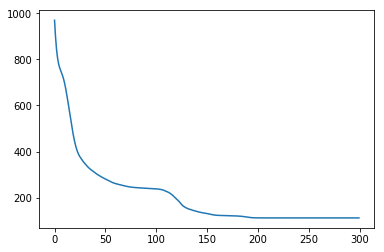

In [41]:
plt.plot(iso.stress)

In [42]:
X_reduced = np.array(iso.Zs[-1])
X_reduced.shape

(400, 2)

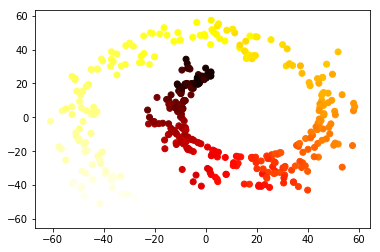

In [43]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], cmap='hot', c=(y/np.max(y)))
plt.show()